<a href="https://colab.research.google.com/github/FelipeOcampo03/MnistKeras/blob/main/Mnist_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


##Cargar datos

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data () #Importar datos junto con labels

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(60000, 28, 28)

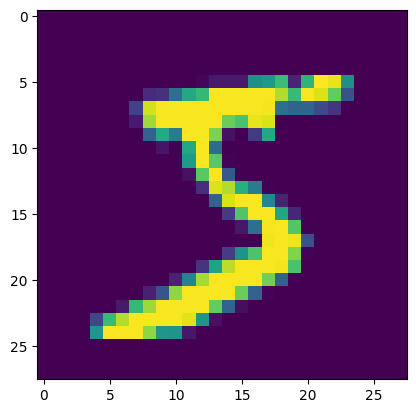

In [ ]:
plt.imshow(train_data[0])

In [ ]:
train_labels[0]

5

##Red neuronal

In [ ]:
model = models.Sequential() #Declarar modelo
#Agregar capas
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax')) #10 posibles salidas (0...9)

In [ ]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary() #Info de la red

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Modificación a la data, cambiar la forma
x_train= train_data.reshape((60000,28*28)) #Se cambia de 3 a 2 dimensiones, facilita el uso de la red neuronal
x_train= x_train.astype('float32')/255 #Se modifica a float para facilitar su uso y se lleva hasta 255 porque es el nivel máximo de cada pixel

x_test= test_data.reshape((10000,28*28))
x_test= x_test.astype('float32')/255


In [ ]:
 #Categorizar la posible salida de manera vectorial, para fácil manejo de la información
y_train= to_categorical(train_labels)
y_test= to_categorical(test_labels)

In [ ]:
train_labels[0]

5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
##Entrenar la red
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.0294 - accuracy: 0.9916
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9939
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0163 - accuracy: 0.9955
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9969
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 0.9976


In [ ]:
#Evaluar cómo funciona la red de datos
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9829


[0.06332061439752579, 0.9829000234603882]

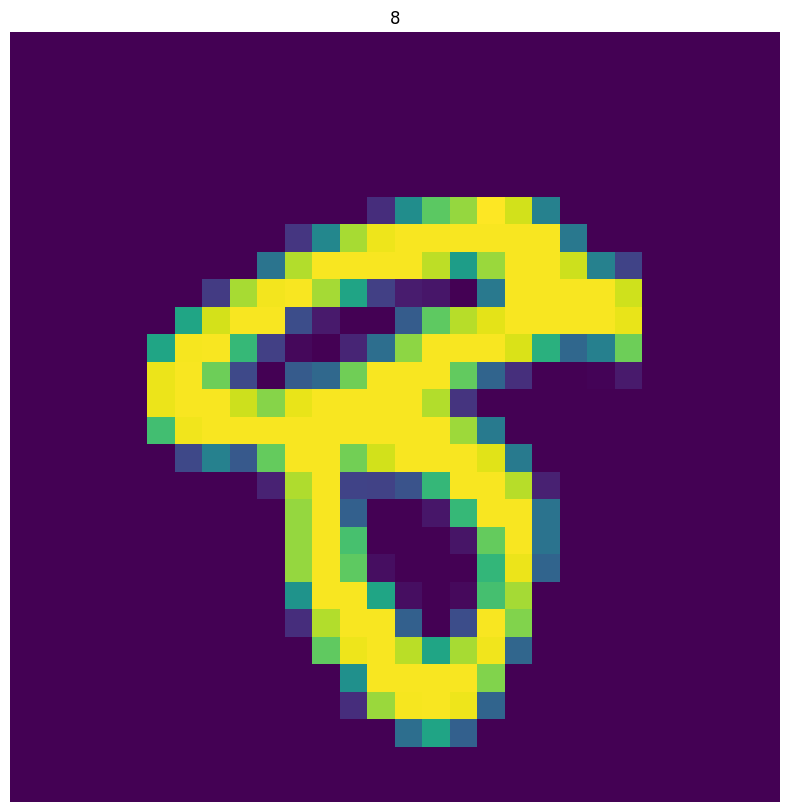

In [ ]:
# Selecciona un numero al azar dentro de x_test
index = 1052
plt.figure(figsize=(10,10))
d_image = x_test[index]
plt.imshow(d_image.reshape(28, 28))
# plt.title(y_test[index]) # para verlo como array
plt.title( np.argmax(y_test[index], axis=-1) ) # para ver el numero como tal
plt.axis(False)
plt.show()

In [ ]:
prediccion_array = model.predict(x_test[index].reshape(1,28*28))

print('el numero es:',np.argmax(prediccion_array, axis=-1), 'cierto?')

1/1 [==============================] - 0s 191ms/step
el numero es: [8] cierto?
